# <font color='maroon'>Comparing two samples</font>

## Michael NANA KAMENI

Given two sample data sets, what are the differences between the two data sets? In this lesson we get to quantify some of the observations we made earlier on with the `smoking and pregnancy dataset`. We ask the question: what is the difference in the birth weights of babies born to women who smoked and those who didn't smoke during pregnancy? We formulate this question statistically by setting up a hypothesis about the two groups and testing it.

We may want to test if there is a significant difference between the means of two groups. For this we use a two-sample t-test. The data has to contain an independent, categorical variable that distinguishes the two groups, and a continuous dependent variable we wish to study. Division of the groups by babies' sex for instance makes sure the **two groups are independent**. This ensures that one person cannot be a member of two groups.

The test also requires that the **dependent variable be normally distributed within the two groups**. And the **variances be equal**. In order establish normality, we will use a graphical approach. To test for equal variance we use the Levene's Test of Equality of Variances.

So if we wish to compare how different the means of the two groups, we can apply a t-test: say group 1 with mean denoted $\mu_1$, and group 2 which has mean $\mu_2$. The null and alternative hypotheses are as follows:

$H_0: \mu_1 = \mu_2$, i.e., there is no difference between the means of the two groups.

$H_1: \mu_1 \neq \mu_2$, i.e., there is a difference between the means of the two groups. Because we are indifferent to whether the mean of group is greater or lesser than the mean of the other group, a tail-tailed significance test is applicable here.  

A significance level of $\alpha = 0.05$ is often used in practice and this is what we will apply for our test.




## Two-Sample T-test

Using the data set on smoking and pregnancy, let's see how two-sample t-tests can be applied with Python.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('smoking-and-pregnancy.csv', sep=';')

In [4]:
df.shape

(128, 6)

In [5]:
df.tail()

,GestationalAge,Sex,Birthweight,Birthlength,Smoking,CigarettesPerDay
123,262,girl,3.20,50.0,N,NaN
124,279,girl,3.52,53.0,N,NaN
125,273,girl,3.40,51.0,Y,NaN
126,274,girl,3.74,52.0,Y,15.0
127,274,boy,4.08,55.0,N,NaN


The means of the two groups can be found as follows:

In [6]:
data = df.groupby('Smoking')
for smoking, value in data['Birthweight']:
    print (smoking, value.mean())

N 3.5937234042553188
Y 3.385294117647059


The average birth weight in kilograms is 3.593 kg for non-smokers and 3.385 kg for smokers. **We wish to answer whether smoking negatively affects the growth of a baby**.

## Visualization

We see the two groups clearly with a stripplot in `seaborn`.  

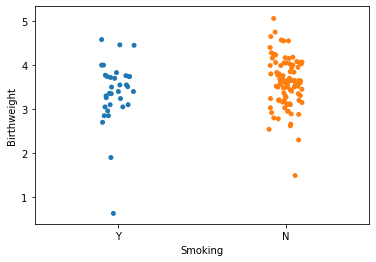

In [7]:
sns.stripplot(x='Smoking', 
              y='Birthweight', # vertical column
              data=df,       # pandas dataframe
              jitter=True)     # add random jitter to separate the dots

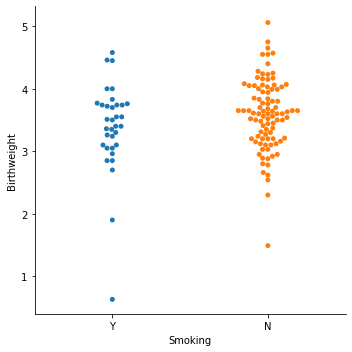

In [8]:
sns.catplot(x="Smoking", y="Birthweight", kind='swarm',data=df);

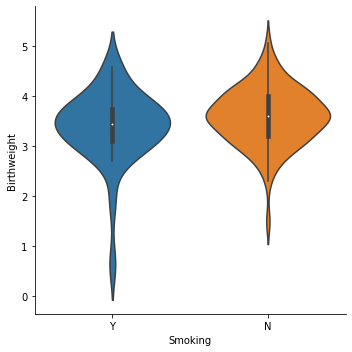

In [29]:
sns.catplot(x="Smoking", y="Birthweight",kind="violin",data=df);

### Checking for normality

Are the data normally distributed within the two groups? For this we use a quantile-quantile plot which helps us to see if the two data sets have the same distribution. We also use the quantile plots because we want to check for normality of the data which is one of the conditions for applying a two-sample t-test. For this we use the `statsmodels.api` functionality.

In [9]:
smokers = df[df['Smoking']=='Y']['Birthweight'] #create a subset of the dataframe containing smoking moms' babies birthweight
nonsmok = df[df['Smoking']=='N']['Birthweight'] #create a subset of the dataframe containing non-smoking moms' babies birthweight

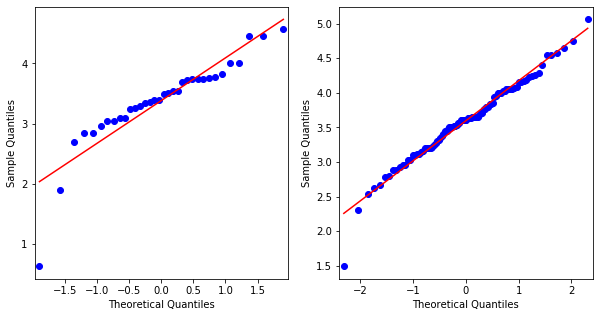

In [10]:
# create figure instance, and the two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax_s = sm.qqplot(smokers, 
                 ax=ax1,   # put in first subplot section
                 line='r') # include regression line
ax_n = sm.qqplot(nonsmok, 
                 ax=ax2,
                 line='r')

Sample quantiles are plotted against theoretical quantiles, in this case, normal theoretical quantiles. Linearity of the data points suggests that the data are normally distributed. We see outliers at the lower end of the plots. This suggests the data is skewed to the left and appears to be more prominent in the Smokers plot on the left. Let's plot histograms to see if this is the case.

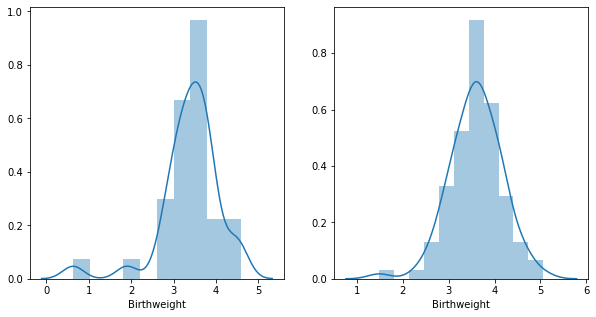

In [11]:
# create figure instance, and the two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.distplot(smokers, ax=ax1) # plot on ax1
sns.distplot(nonsmok, ax=ax2) # plot on ax2

As expected, both groups have outliers and are skewed to the left with the effect being slightly more prominent among babies of smoking mothers.

### Check for equal variance

Are the variances equal for these two groups? We use Levene's Test of Equality of Variances. We test the null hypothesis that all input samples are from populations with equal variances. The test returns a statistic and p-value.

In [12]:
stats.levene(smokers, nonsmok)

LeveneResult(statistic=0.3011748312225438, pvalue=0.5841180082900308)

Suffice for now, the p-value is greater than 0.05. We accept the null hypothesis that the two samples variances are equal. 

## Formulating the hypothesis

We wish to answer the question whether smoking negatively affects the weight of a baby. Our data consists of two groups -- smoking mothers and nonsmoking mothers. Statistically, we want to understand if the mean weight of babies whose mothers are smokers is less than the mean weight of babies whose mothers are nonsmokers. Our null hypothesis will be that smoking does not affect a baby's weight. The alternative hypothesis is that smoking negatively affects the weight of a baby. That is,

$H_0: \mu_0 = \mu_1$, or equivalently, $\mu_0 - \mu_1  = 0$.

$H_1: \mu_0 < \mu_1$, or equivalently, $\mu_0 - \mu_1 < 0$.

Note that this is a one-sided hypothesis test. We consider only one tail end of the standard normal distribution. 

We will perform the test at a 5% signficance level, the cutt-off point were if the test statistic computed has a probability $P$ and 

$P > 0.05$, we accept the null hypothesis; otherwise, with

$P < 0.05$, we reject the null hypothesis.


## The T-test

So now we test our hypothesis. We use the `scipy.stats.ttest_ind()` function that is an independent test for two-sided test. The test assumes the samples have equal variances. If we had seen unequal variances in our check earlier, we would have set variance as unequal with the `equal_var` option.

In [13]:
t,p = stats.ttest_ind(nonsmok,smokers) # test returns the t-statistic and p-value for the ttest


Caution must be taken here when reading these results. We stated that we wanted to see if smoking negatively affects birth weight. Therefore the test lends itself to a one-tailed test. The result we obtained is for a two-tailed hypothesis test. Because of the symmetry in the t-test, we divide the p-value in half. 

In [14]:
p/2.0

0.04517075850681072

### Interpreting the results

When reporting and interpreting the results of the t-test, say what kind of test for normality of the dependent variable and test for homogeneity of variance were conducted. Then report on the results that include the t-statistic value, and the significance value of the test, i.e., the p-value.

Normal QQ plots showed that the weight of babies is approximately normally distributed for both groups. The Levene's test for equality of variance indicated there was homogeneity of variance. An independent t-test was run on the data. A 95% conficence interval was used for the mean difference. The evidence indicates that difference in means is negative. 

### Exercise

Restate the alternative hypothesis in order to be able to conduct a two-sided hypothesis test. What conclusions can you draw? 

- There is a significant difference between the means weight of babies whose mothers are smoker and the means weight of babies whose mothers are not smoker.
- The mean weight of babies whose mothers are non-smoker is greater than the mean weight of babies whose mothers are smoker.

As conclusion, Mother smokers influences negatively the weight of their babies during pregnancy.  

Is the height of a baby affected by smoking? State the null and alternative hypothesis and conduct a some tests. What conclusions do you draw?

Let's assume that $\mu_1$ is the mean lenght of babies whose mothers are non-smoker and that $\mu_2$ is the mean lenght of babies whose mothers are smoker.  
So, since we wish to compare how different the mean lenght of babies whose mothers are non-smoker with the mean lenght of babies whose mothers are smoker, let us define null and alternative hypotheses are as follows:

- $𝐻_0: \mu_1 = \mu_2$, i.e., there is no difference between the mean lenght of babies whose mothers are non-smoker and the mean lenght of babies whose mothers are smoker.

- $ 𝐻_1: \mu_1 \neq \mu_2$ , i.e., there is a difference between the mean lenght of babies whose mothers are non-smoker and the mean lenght of babies whose mothers are smoker.

In [15]:
df['Birthlength'].isnull().sum()

2

In [16]:
df['Birthlength'].fillna(df['Birthlength'].mean(), inplace=True)

In [17]:
df['Birthlength'].isnull().sum()

0

In [18]:
data = df.groupby('Smoking')
for smoker, value in data['Birthlength']:
    print(smoker, value.mean())

N 52.1968085106383
Y 51.739729225023346


The average birth lenght in centimetre is 52.197 cm for babies whose mothers are non-smokers and 51.74 cm for babies whose mothers are smokers. <b>We wish to answer whether smoking negatively affects the length growth of a baby.</b>


# Visualization

We see the two groups clearly with a stripplot in seaborn.

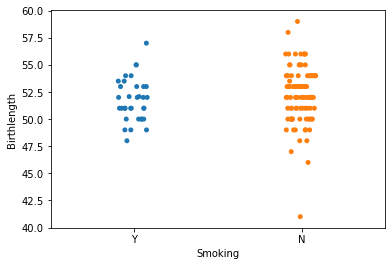

In [19]:
sns.stripplot(x ='Smoking',       # Horizontal axis
              y ='Birthlength',   # Vertical axis
              data = df,          # Pandas Dataframe
              jitter = True)      # add random jitter to separate the dots

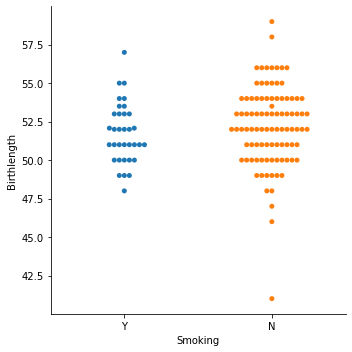

In [20]:
sns.catplot(x="Smoking", y="Birthlength", kind='swarm',data=df);

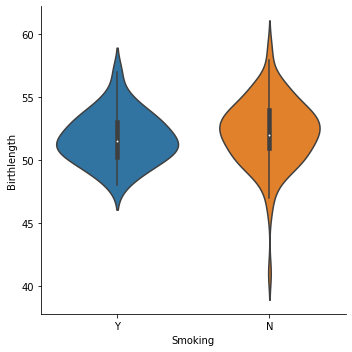

In [30]:
sns.catplot(x="Smoking", y="Birthlength",kind="violin",data=df);

# To check if data is normaly distributed within subgroup.

In [21]:
nonsmoker = df[df['Smoking']=='N']['Birthlength'] # create a subset of the dataframe containing non-smoking moms' babies birthlength.
smoker = df[df['Smoking']=='Y']['Birthlength'] # create a subset of the dataframe containing smoking moms' babies birthlength.

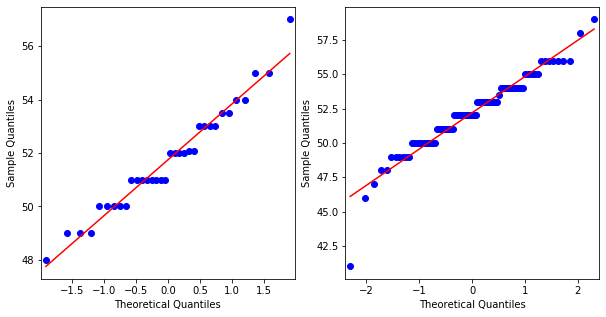

In [22]:
# create figure instance, and the two subplots
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(10,5))
ax_s = sm.qqplot(smoker, 
                 ax=ax1,   # put in first subplot section
                 line='r') # include regression line
ax_n = sm.qqplot(nonsmoker,
                 ax = ax2,
                 line ='r')

Sample quantiles are plotted against theoretical quantiles, in this case, normal theoretical quantiles. Linearity of the data points suggests that the data are normally distributed. We see outliers at the lower end of the plot for non-smoker mothers. This suggests the data is skewed to the left and appears to be more prominent in the plot on the left. Let's plot histograms to see for a deep analysis of this case.

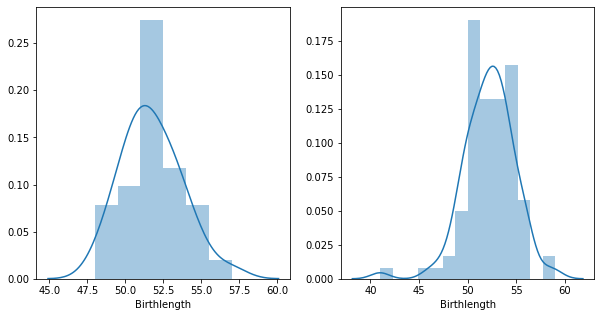

In [23]:
# create figure instance, and the two subplots
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(10,5))
sns.distplot(smoker, ax=ax1) # plot on ax1
sns.distplot(nonsmoker, ax=ax2) # plot on ax2

The graph show two outlier for the non-smoker mothers. To confirm let's plot box-and-whisker plot.

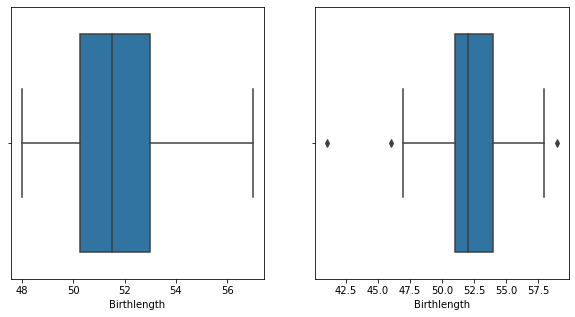

In [24]:
fig, (ax1, ax2)= plt.subplots(ncols= 2, figsize=(10,5))
sns.boxplot(smoker, ax=ax1) # plot on ax1
sns.boxplot(nonsmoker, ax=ax2) # plot on ax2

And the box-and-whisker plot confirms that there are two outlier in the subgroup of Birthlength of babies from non-smoker mothers.

In [25]:
#nonsmoker.head()
#Remove the outliers from the height column
#q_low =nonsmoker['Birthlength'].quantile(0.03)
#q_hi  =nonsmoker['Birthlength'].quantile(0.99)
#athletes_filtered = nonsmoker[(pd.nonsmoker['Birthlength'] < q_hi) & (nonsmoker['Birthlength'] > q_low)]

## Check for equal variance

We use Levene's Test of Equality of Variances. We test the null hypothesis that all input samples are from populations with equal variances. The test returns a statistic and p-value.

In [26]:
stats.levene(smoker, nonsmoker)

LeveneResult(statistic=1.5115614988730244, pvalue=0.2211918759444389)

Since p-value = 0.22 and greater than 0.05, we conclude that there is no difference between the variances in the population. Since, the null hypothesis of equal variances is accepted.

# The T-test

So now we test our hypothesis. We use the scipy.stats.ttest_ind() function that is an independent test for two-sided test. The test assumes the samples have equal variances. If we had seen unequal variances in our check earlier, we would have set variance as unequal with the equal_var option.

In [27]:
t,p = stats.ttest_ind(smoker, nonsmoker)   # test returns the t-statistic and p-value for the ttest
p/2.0

0.17893183889211778

# Interpreting the results

Normal QQ plots showed that the length of babies is approximately normally distributed for both groups. The Levene's test for equality of variance indicated there was homogeneity of variance. An independent t-test was run on the data. A 95% conficence interval was used for the mean difference. The evidence indicates that difference in means is negative.

### Bonus Exercise

Write a Python function to verify the above results. Use formulas given on this link to create a function for a two-sample t-test where samples are independent and have unequal variance. Discuss your results.
<a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia, Student's t-test</a>

In [28]:
# your answers